---

# <center>Interpolation Methods for Processing Images</center>

---

## ⚙️ 1. Environment Settings

### 1.1 Package Installation

- <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Watermark</strong> is a tool for adding package version annotations, date and time, author name and other information in Jupyter notebooks.</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>OpenCV</strong> (Open Source Computer Vision Library) is a programming library primarily focused on computer vision and image processing.</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>OpenCV-Contrib</strong> is an extended version of OpenCV that includes extra contributions, including experimental and unofficial algorithms. It is useful for accessing advanced or developing functionality that is not available in the standard version of OpenCV.</p>

In [1]:
# Install the watermark
# !pip install -q -U watermark

# Install opencv-python
# !pip install -q -U opencv-python

# Install opencv-contrib-python
# !pip install -q -U opencv-contrib-python

### 1.2 Packet Load

In [2]:
# Opencv (Open Source Computer Vision Library)
import cv2

# Development environment
import warnings

# Math & Algebra
import numpy as np

# Image View
from PIL import Image
import imageio.v2 as imageio

# Data Visualization
import matplotlib.pyplot as plt

# Environment Settings
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
# Water mark - Autor
%reload_ext watermark
%watermark -a "Murilo Rocha"

Author: Murilo Rocha



### 1.3 Versions and Machine Used

In [4]:
# Versions of Packages Used
%watermark --iversion

numpy     : 1.24.3
matplotlib: 3.7.2
imageio   : 2.31.1
cv2       : 4.9.0
PIL       : 9.4.0



In [5]:
# Settings of the Machine Used to Run This Jupyter Notebook
%watermark -v -m

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.15.0-92-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



## 🪚 2. Interpolation Methods

- <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>INTER_AREA (Area Interpolation):</strong> Recommended for reducing image size. This method calculates the value of a pixel by taking the weighted average of the pixels in the corresponding source area. It is effective in avoiding Moiré artifacts that are common in other techniques during image reduction.</p>

- <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>INTER_NEAREST (Nearest Neighbor Interpolation):</strong> Simplest and most efficient method, ideal for high-resolution images when speed is crucial. Selects the pixel value closest to the transformed point, resulting in an image with visible pixelation, especially at significant magnifications.</p>

- <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>INTER_LINEAR (Bilinear Interpolation):</strong> Method that balances quality and speed, suitable for moderate resizing. It calculates the pixel value as a linear weighted average of the four closest pixels. It offers better results than its nearest neighbor, avoiding excessive pixelation, but may still present some loss of detail at high magnifications.</p>

- <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>INTER_CUBIC (Bicubic Interpolation):</strong> It offers superior smoothness, making it ideal for image enlargements. Uses a cubic function to estimate the value of new pixels based on the nearest 16 pixels (4x4 area) around the target pixel. This method produces smoother images with better preservation of details compared to bilinear interpolation, and is preferable for significant magnifications and when quality is more important than processing speed.</p>

### 2.1 Defining Interpolation Methods with OpenCV

In [6]:
# Defining the interpolation methods
interpolation_methods = [
    ("INTER_AREA",    cv2.INTER_AREA),
    ("INTER_NEAREST", cv2.INTER_NEAREST),
    ("INTER_LINEAR",  cv2.INTER_LINEAR),
    ("INTER_CUBIC",   cv2.INTER_CUBIC)
]

### 2.2 Loading Image

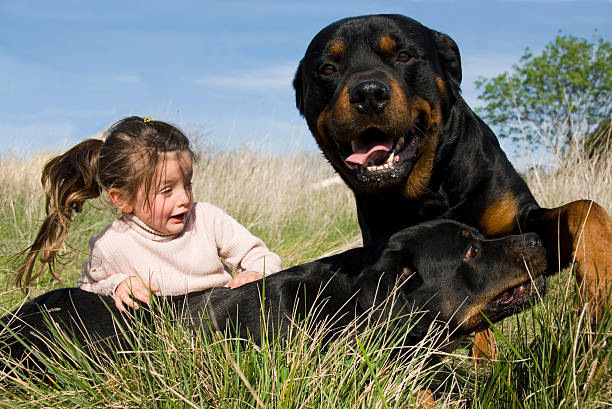

In [7]:
# Uploading Image with imageio
img_original = imageio.imread("imagens/menina_cachorro.jpg")

# Viewing image
Image.open("imagens/menina_cachorro.jpg")

### 2.3 Reducing Image Dimensions

In [8]:
# Applying different interpolation methods for image reduction
imgs_reduce = [img_original] + [cv2.resize(img_original, (115, 115), interpolation=method[1]) for method in interpolation_methods]

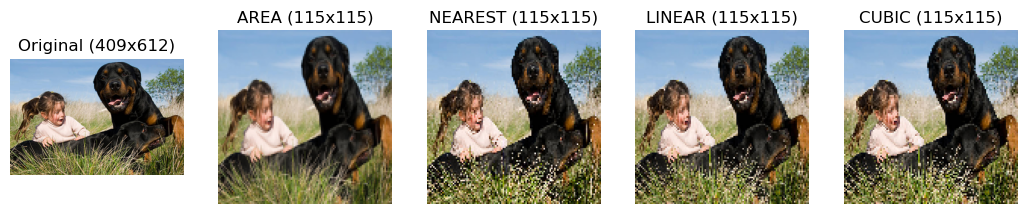

In [30]:
# View Settings
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(13, 6))

# Títulos
titles = ["Original (409x612)", "AREA (115x115)", "NEAREST (115x115)", "LINEAR (115x115)", "CUBIC (115x115)"]

# Plotting image
for i in range(0, len(imgs_reduce)):
    ax = axs[i]
    ax.imshow(imgs_reduce[i])
    ax.axis("off")
    ax.set_title(titles[i])
# Salvando a imagem
fig.savefig('imagens/reduce.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

### 2.4 Enlarging the Dimensions of the Original Image

In [23]:
# Applying different interpolation methods for image enlargement
imgs_enlargement = [imgs_reduce[1]] + [cv2.resize(imgs_reduce[1], (509, 712), interpolation=m[1]) for m in interpolation_methods]

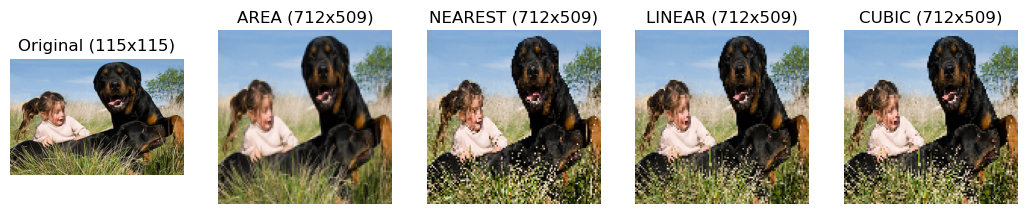

In [29]:
# View Settings
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(13, 6))

# Títulos
titles = ["Original (115x115)", "AREA (712x509)", "NEAREST (712x509)", "LINEAR (712x509)", "CUBIC (712x509)"]

# Plotting image
for i in range(0, len(imgs_reduce)):
    ax = axs[i]
    ax.imshow(imgs_reduce[i])
    ax.axis("off")
    ax.set_title(titles[i])
# Salvando a imagem
fig.savefig('imagens/enlargment.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

## 3. Conclusão